Saving StudentsPerformance.csv to StudentsPerformance.csv
MSE: 208.4138535868042
RMSE: 14.436545763679213
R2 Score: 0.027768850210297735
                    Coefficient
Study Hours           -0.245740
Attendance            -1.016513
Parental Education    -1.014648
Test Prep             -3.811811
Sleep Hours           -0.122936


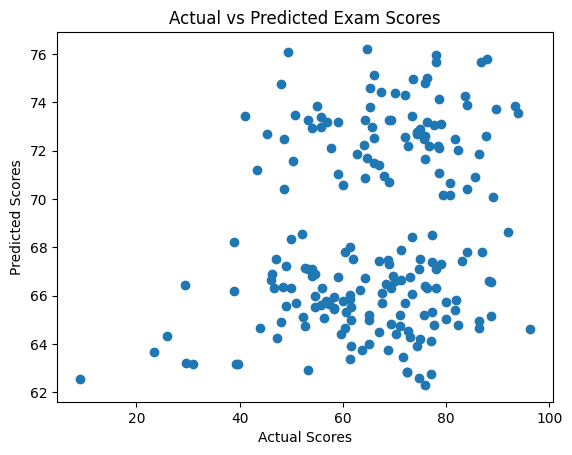

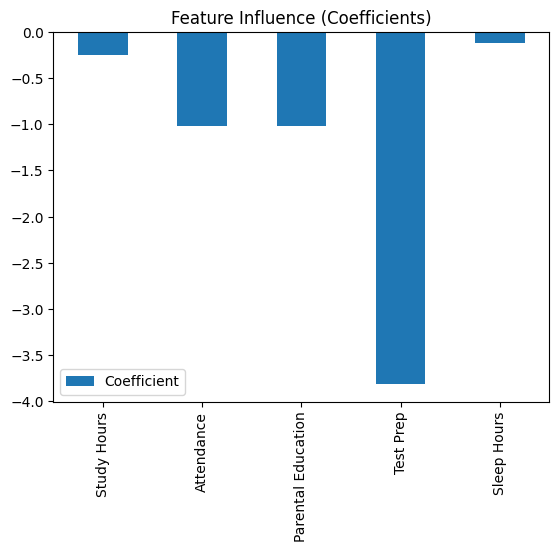

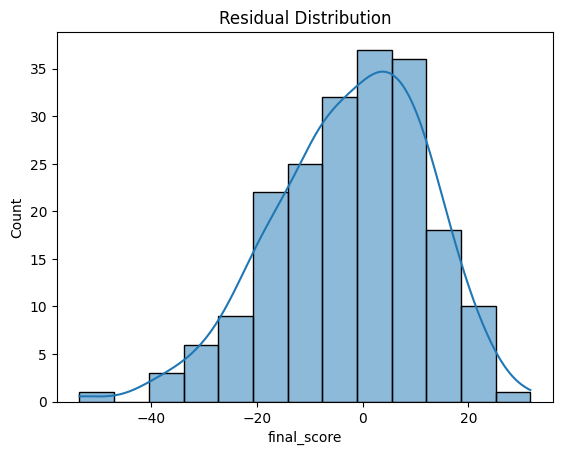

In [2]:
# Multilinear Regression – Student Performance Prediction
# Name: Navithanjali
# Roll No: 24BAD077
from google.colab import files
uploaded = files.upload()
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load dataset
df = pd.read_csv("StudentsPerformance.csv")  # download from Kaggle

# 3. Compute target variable (Final Exam Score)
df['final_score'] = (df['math score'] +
                     df['reading score'] +
                     df['writing score']) / 3

# 4. Encode categorical variables
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# 5. Feature selection
X = df[['parental level of education',
        'test preparation course']]
y = df['final_score']

# (Simulated academic/lifestyle features)
df['study_hours'] = np.random.randint(1, 6, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(4, 9, size=len(df))

X = df[['study_hours', 'attendance',
        'parental level of education',
        'test preparation course',
        'sleep_hours']]

# 6. Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 7. Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Train Multilinear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 10. Prediction
y_pred = model.predict(X_test)

# 11. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# 12. Regression coefficients
coeff_df = pd.DataFrame(model.coef_,
                        ['Study Hours', 'Attendance',
                         'Parental Education',
                         'Test Prep', 'Sleep Hours'],
                        columns=['Coefficient'])
print(coeff_df)

# 13. Ridge & Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# -------------------- VISUALIZATION --------------------

# Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

# Coefficient comparison
coeff_df.plot(kind='bar')
plt.title("Feature Influence (Coefficients)")
plt.show()

# Residual distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


Saving auto-mpg.csv to auto-mpg.csv

Degree 2
MSE: 13.760855128148345
RMSE: 3.709562659957147
R2 Score: 0.7440623896917427


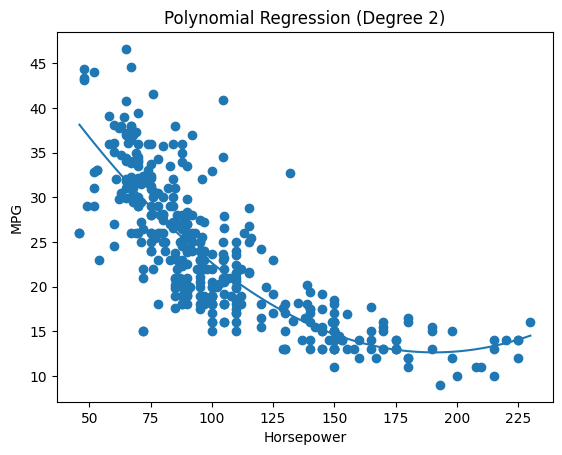


Degree 3
MSE: 13.813374257349995
RMSE: 3.716634802795399
R2 Score: 0.7430855884466044


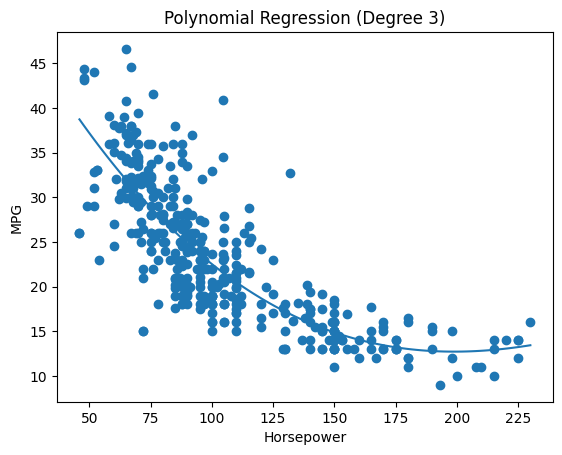


Degree 4
MSE: 14.118024022829639
RMSE: 3.757395909779756
R2 Score: 0.7374194192854788


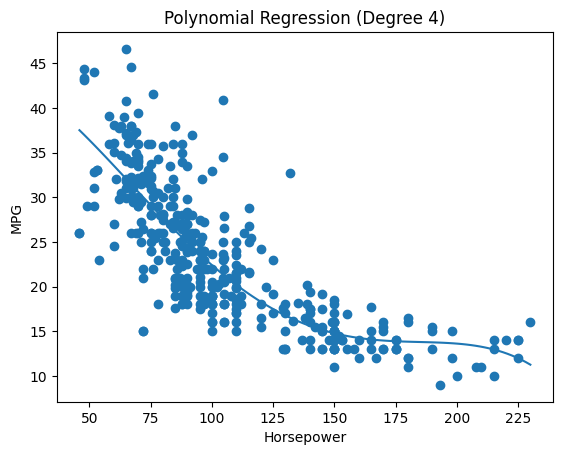


Ridge Regression (Degree 4)
R2 Score: 0.7393206570438192


In [3]:
# =====================================================
# Polynomial Regression – Auto MPG Dataset
# Name: Navithanjali
# Roll No: 24BAD077
from google.colab import files
uploaded = files.upload()
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# 2. Load dataset
df = pd.read_csv("auto-mpg.csv")

# 3. Clean dataset
df.replace('?', np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# 4. Select feature & target
X = df[['horsepower']]
y = df['mpg']

# 5. Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Polynomial Regression (degree 2,3,4)
degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\nDegree {d}")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

    # Visualization
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_scaled = scaler.transform(X_range)
    X_range_poly = poly.transform(X_range_scaled)

    plt.scatter(X, y)
    plt.plot(X_range, model.predict(X_range_poly))
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.show()

# 9. Ridge Regression to reduce overfitting
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

print("\nRidge Regression (Degree 4)")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
